### Imports

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score)
from sklearn import preprocessing
from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import r2_score, make_scorer, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


In [2]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


### The data

Loading and reading the data, basic inspection and understanding its structure.

In [3]:
# Read the data into a pandas dataframe
adult_data = pd.read_csv("adult.csv", delimiter=", ")
adult_df = pd.DataFrame(adult_data)

/tmp/ipykernel_28596/1591948089.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult_data = pd.read_csv("adult.csv", delimiter=", ")


In [4]:
# Get 5 first rows to get to know the data
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Print the columns names
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### EDA

Basic information and summary of dataset structure

In [6]:
# Print column-names and dtypes
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Summary statistics

In [7]:
# Get summary statistics for numerical columns
numerical_data_df = adult_df.select_dtypes(include="number")
numerical_data_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


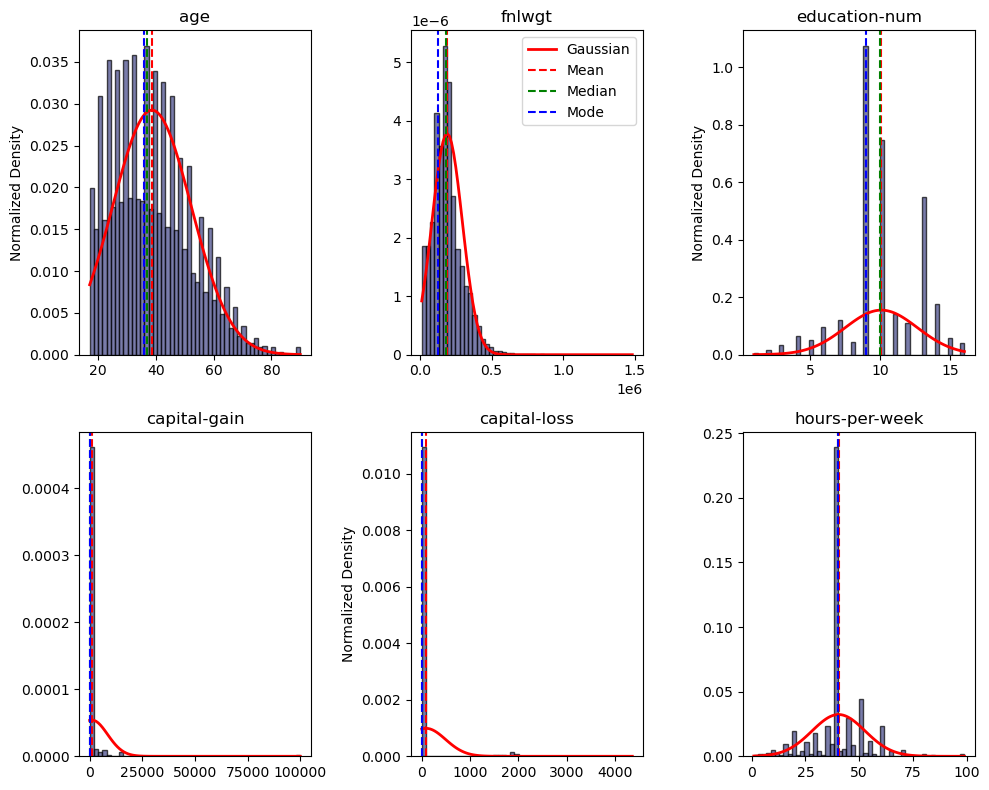

In [8]:
# Generate histograms to see the distribution of numerical variables

# Create a 2x3 matrix of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numerical columns and plot histograms
for i, col in enumerate(numerical_data_df.columns):

    # Select color
    cmap = plt.get_cmap("viridis")
    color = cmap(0.2)

    # Create a histogram subplot
    ax = axes[i]
    ax.hist(numerical_data_df[col], bins=50, alpha=0.7, color=color,
            edgecolor="black", density=True)

    # Calculate mean and standard deviation
    mean = numerical_data_df[col].mean()
    std = numerical_data_df[col].std()

    # Generate and plot the Gaussian curve using the mean and standard deviation
    x = np.linspace(
        numerical_data_df[col].min(), numerical_data_df[col].max(), 100
    )
    y = stats.norm.pdf(x, mean, std)
    ax.plot(x, y, color="red", linewidth=2, label="Gaussian")

    # Plot vertical lines for the mean, and median
    ax.axvline(
        mean, color="red", linestyle="dashed", linewidth=1.5, label="Mean"
    )
    ax.axvline(
        numerical_data_df[col].median(), color="green", linestyle="dashed",
        linewidth=1.5, label="Median"
    )
    ax.axvline(
        numerical_data_df[col].mode().values[0], color="blue",
        linestyle="dashed", linewidth=1.5, label="Mode"
    )

    # Set the title and legend
    ax.set_title(col)
    if i == 1:
        ax.legend(loc="upper right")
    if i % 2 == 0:
        ax.set_ylabel("Normalized Density")

# Adjust the spacing between subplots and display
plt.tight_layout()
plt.show()


In [9]:
# Get summary statistics for categorical columns
categorical_data_df = adult_df.select_dtypes(include="object")
categorical_data_df.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


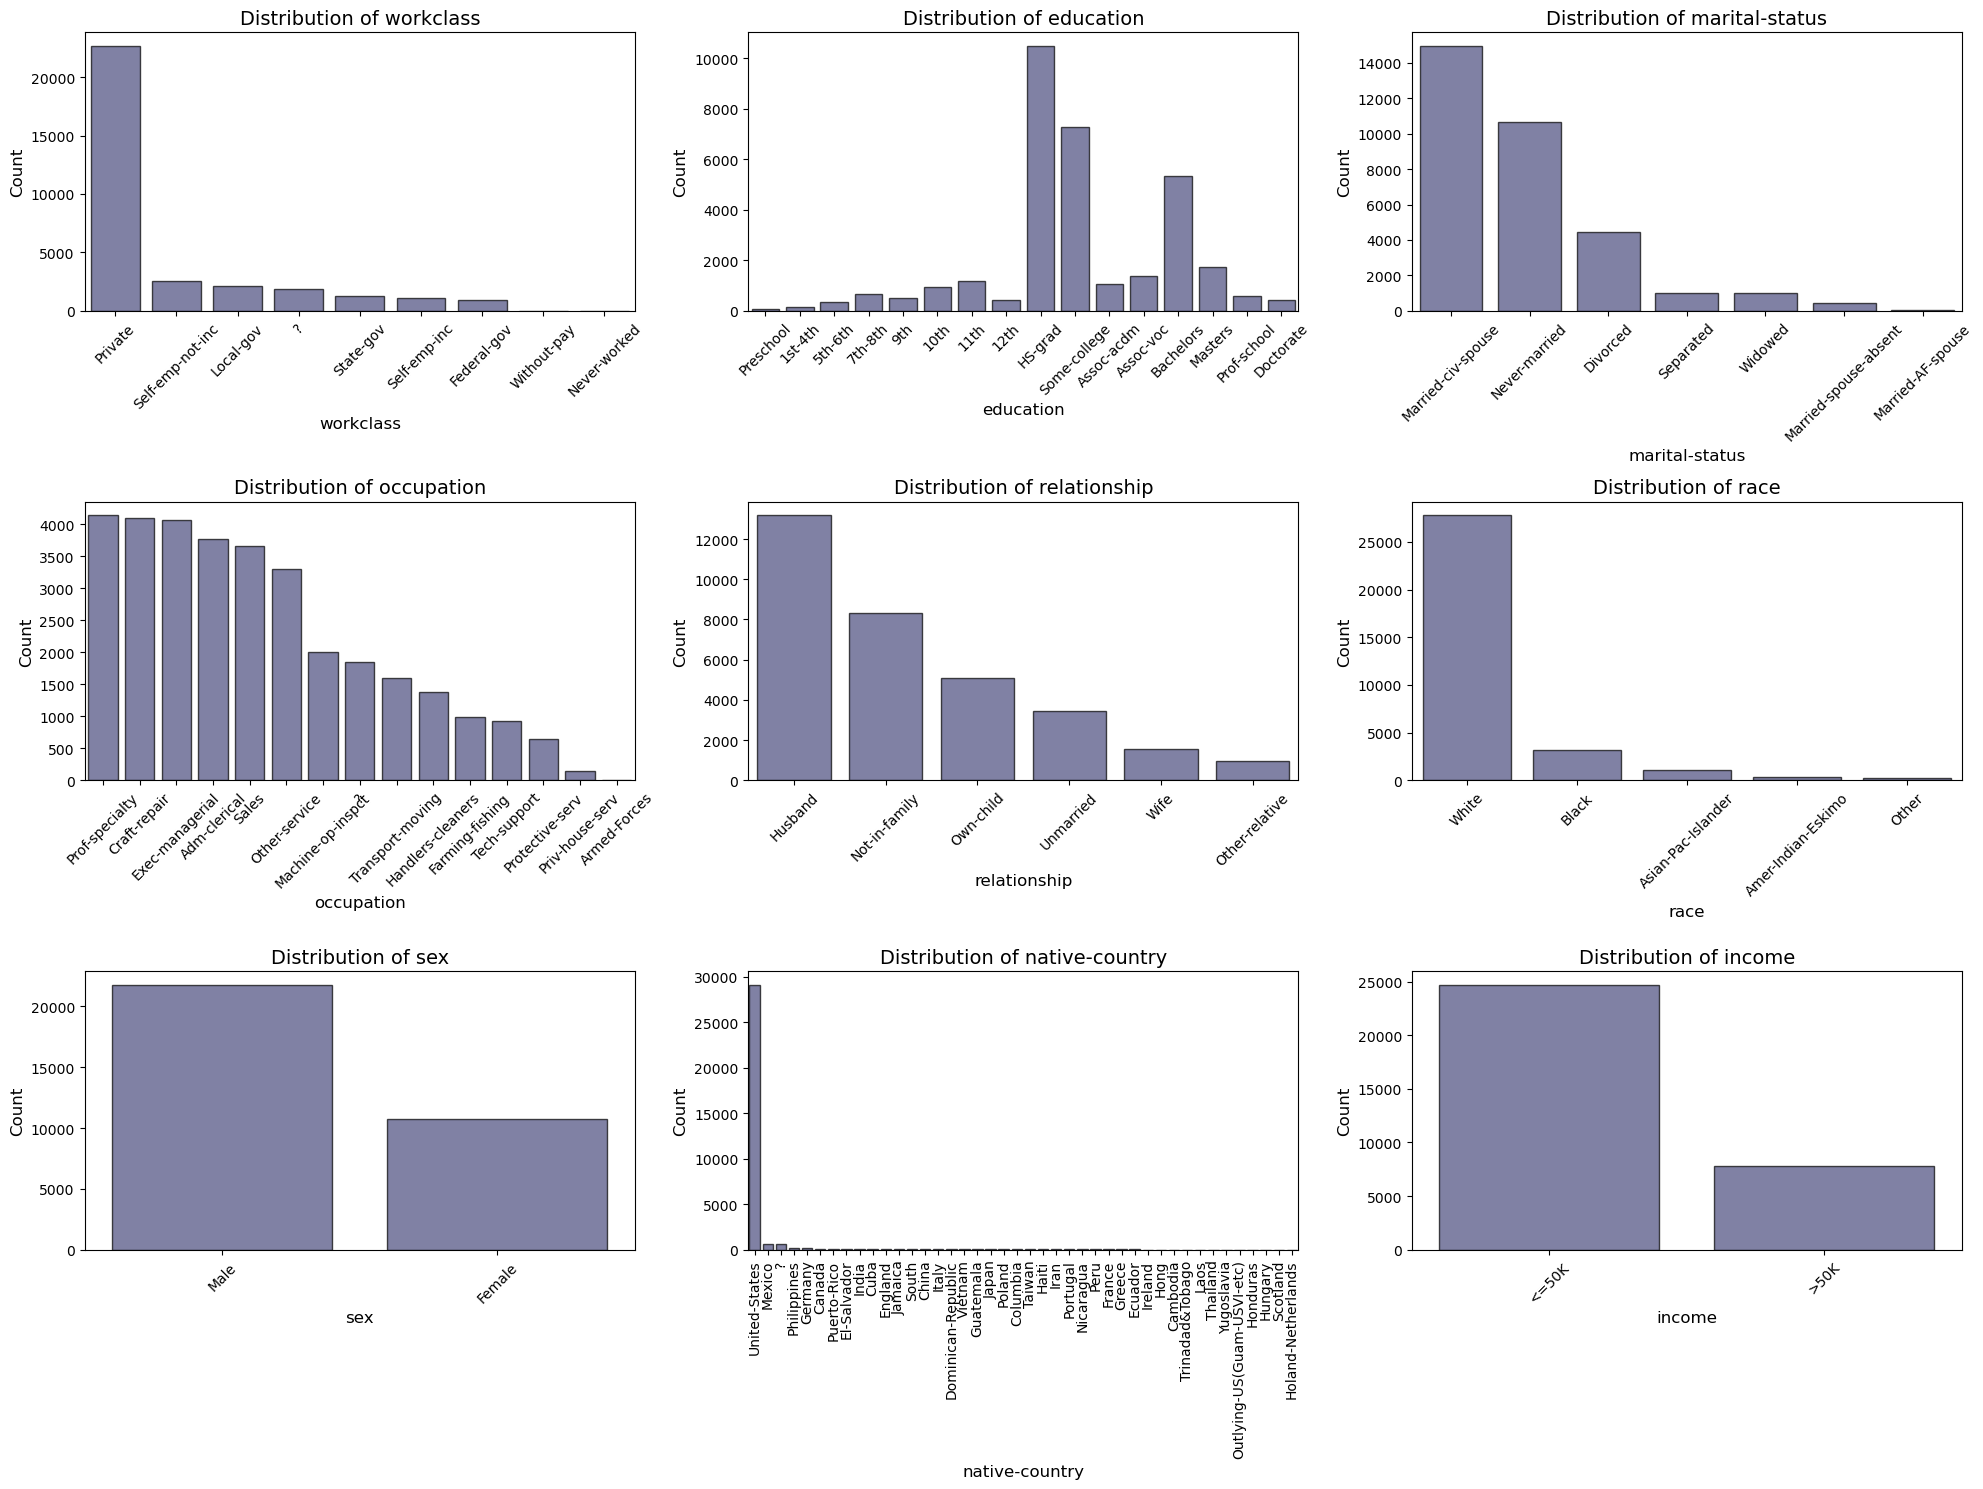

In [10]:
# Generate bar plots to show the distribution of categorical variables

# Custom order for education
education_order = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", 
    "HS-grad", "Some-college", "Assoc-acdm", "Assoc-voc", "Bachelors", "Masters", 
    "Prof-school", "Doctorate"
]

# Create a matrix of subplots based on the number of categorical columns
n_cols = 3 
n_rows = (len(categorical_data_df.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over categorical columns and plot bar plots
for i, col in enumerate(categorical_data_df.columns):
    ax = axes[i]
    # Get value counts for the column
    value_counts = categorical_data_df[col].value_counts()

    # Select color
    cmap = plt.get_cmap("viridis")
    color = cmap(0.2)

    # Set custom order for education feature
    if col == 'education':
        order = education_order
    else:
        order = None
    
    # Create a bar plot
    sns.barplot(
        x=value_counts.index, 
        y=value_counts.values, 
        color=color, 
        alpha=0.7, 
        edgecolor="black", 
        ax=ax, 
        order=order
    )
    
    # Set the title and axis labels
    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    # Set rotation for x-axis labels
    if col == 'native-country':
        ax.tick_params(axis='x', rotation=90)
    else:
        ax.tick_params(axis='x', rotation=45)

# Remove unused subplots if there are any
for j in range(len(categorical_data_df.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()


Clustering like data and handling skewedness

In [11]:
# We wish to change the values of race and education as the 1st-10th grade belongs to primary school
adult_df["education"] = adult_df["education"].transform(lambda x: "preschool" if x in ["11th", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "12th"]\
    else x)

In [12]:
#We will also make the marital status into binary as "in relationship/marriage" and "not in a relationship"
adult_df["marital-status"] = adult_df["marital-status"].transform(lambda x: "In relationship" if x\
    in ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]\
    else "Not in relationship")

Missing values

In [13]:
# Counting the "?" values, which were used to represent missing values in the dataset
question_mark_count = (adult_df == '?').sum().sum()
print(question_mark_count)

4262


In [ ]:
# Checking missing values 
adult_df.replace("?", np.nan, inplace=True)
adult_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [15]:
# The count around workclass and occupation looks very similar. Let's see how many missing values relate to the same people
missing_workclass_Occupation = adult_df[adult_df["workclass"].isna() & adult_df["occupation"].isna()]
missing_workclass_Occupation.count()

age               1836
workclass            0
fnlwgt            1836
education         1836
education-num     1836
marital-status    1836
occupation           0
relationship      1836
race              1836
sex               1836
capital-gain      1836
capital-loss      1836
hours-per-week    1836
native-country    1809
income            1836
dtype: int64

In [16]:
# Counting how many people in total there is with missing values
missing_workclass_Occupation_country = adult_df[adult_df["workclass"].isna()\
    | adult_df["occupation"].isna()\
    | adult_df["native-country"].isna()]
missing_workclass_Occupation_country.count()

# We have a total of 2399 people with missing values

age               2399
workclass          563
fnlwgt            2399
education         2399
education-num     2399
marital-status    2399
occupation         556
relationship      2399
race              2399
sex               2399
capital-gain      2399
capital-loss      2399
hours-per-week    2399
native-country    1816
income            2399
dtype: int64

Duplicates

In [ ]:
# Checking how many duplicates there is
num_of_duplicates = adult_df.duplicated().sum()
print(num_of_duplicates)

24


Unique values

In [ ]:
#Look at the categorical columns unique values to gain overview of which values we are working with 
print(adult_df["workclass"].unique())
print(adult_df["education"].unique())
print(adult_df["marital-status"].unique())
print(adult_df["occupation"].unique())
print(adult_df["relationship"].unique())
print(adult_df["race"].unique())
print(adult_df["sex"].unique())
print(adult_df["native-country"].unique())
print(adult_df["income"].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' 'preschool' 'Masters' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' 'Doctorate' 'Prof-school' 'Preschool']
['Not in relationship' 'In relationship']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yu

Outlier Analysis

In [19]:
# Select numerical columns
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

age: 143 outliers detected
fnlwgt: 992 outliers detected
education-num: 1198 outliers detected
capital-gain: 2712 outliers detected
capital-loss: 1519 outliers detected
hours-per-week: 9008 outliers detected


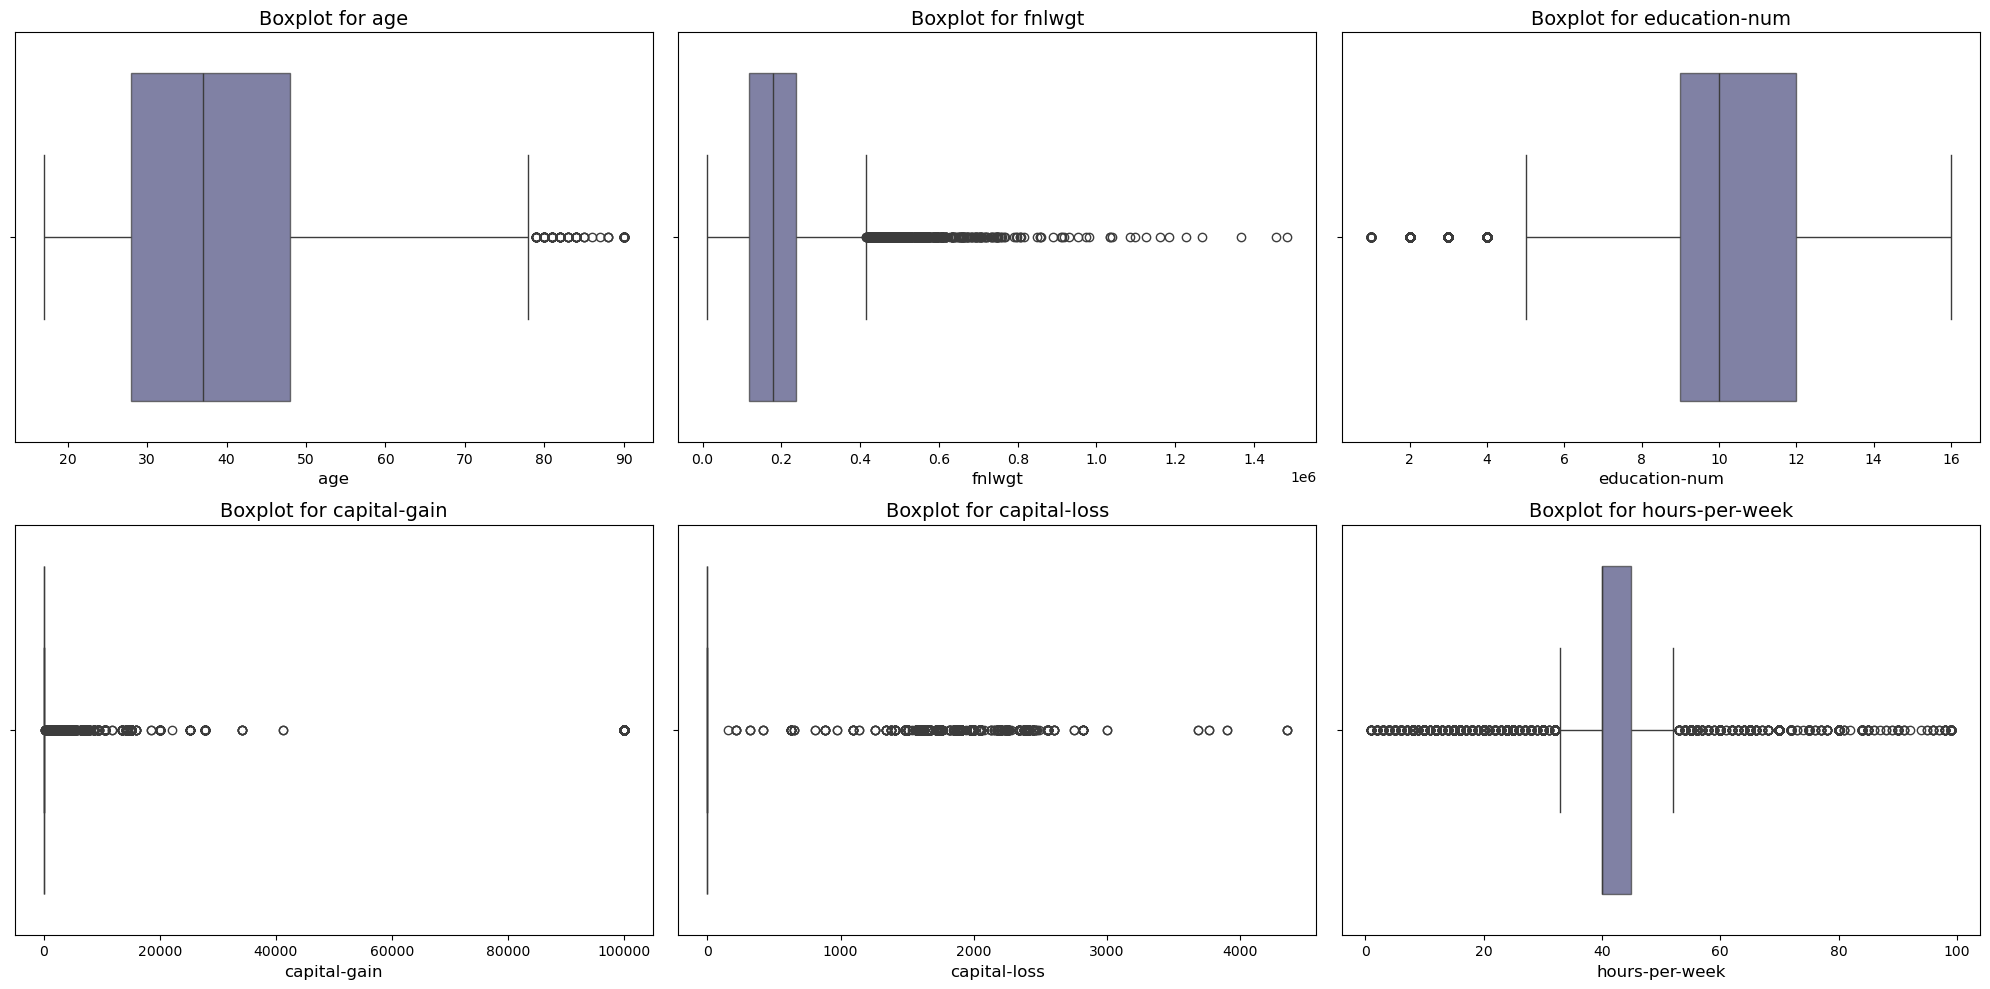

In [20]:
# Detecting outliers using interquartile Range (IQR) Method

# Function to detect outliers using IQR
def outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers

# Create a grid layout for boxplots of numerical features
n_cols = 3  # Number of plots per row
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Calculate required rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_features):
    ax = axes[i]
    
    # Select color
    cmap = plt.get_cmap("viridis")
    color = cmap(0.2)
    
    # Detect outliers
    outliers = outliers_iqr(adult_df, col)
    print(f"{col}: {len(outliers)} outliers detected")
    
    # Create boxplot
    sns.boxplot(x=adult_df[col], ax=ax, color=color, boxprops=dict(alpha=0.7))
    
    # Set title
    ax.set_title(f"Boxplot for {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)

# Remove unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
# Detecting outliers using Z-Score Method

# Common threshold for Z-Scores
THRESHOLD = 3  

# Iterate over each numerical feature to detect outliers
for feature in numerical_features:
    z_scores = np.abs(stats.zscore(adult_df[feature]))
    outliers_count = (z_scores > THRESHOLD).sum()
    
    # Print summary
    print(f"\nNumber of outliers in '{feature}' using Z-Score method: {outliers_count}")


Number of outliers in 'age' using Z-Score method: 121

Number of outliers in 'fnlwgt' using Z-Score method: 347

Number of outliers in 'education-num' using Z-Score method: 219

Number of outliers in 'capital-gain' using Z-Score method: 215

Number of outliers in 'capital-loss' using Z-Score method: 1470

Number of outliers in 'hours-per-week' using Z-Score method: 440


Correlation matrix

In [22]:
# Converting income values into 0 and 1 to keep track of them
adult_df["income"] = adult_df["income"].str.strip().apply(lambda x:  0 if x ==  "<=50K" else 1)

In [23]:
# Get summary statistics for numerical columns
numerical_data_with_income = adult_df.select_dtypes(include="number")
numerical_data_with_income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


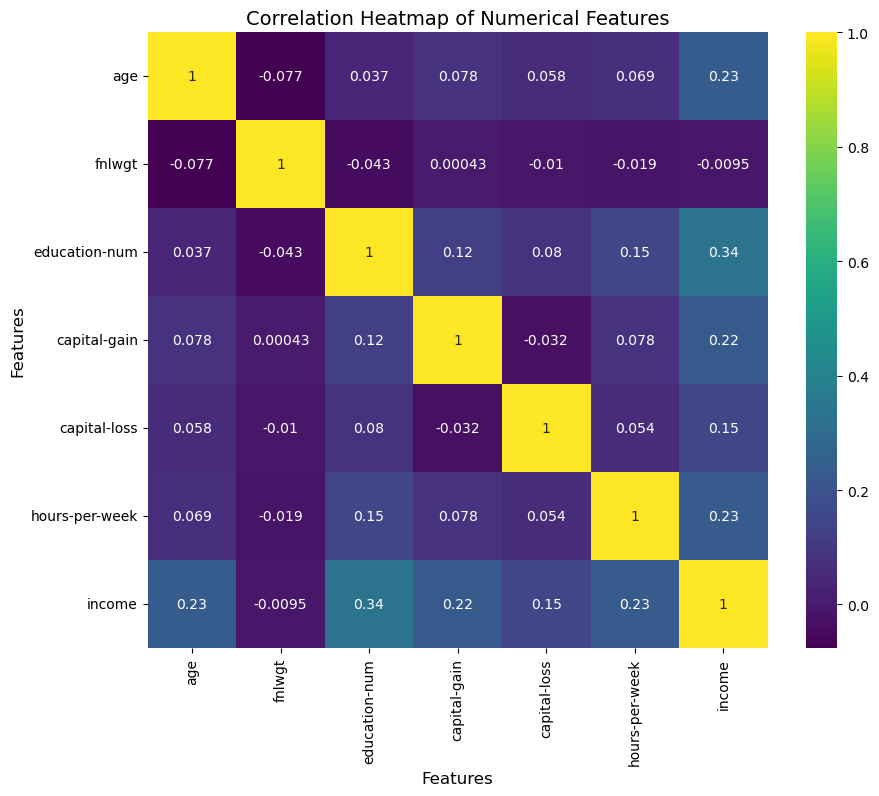

In [24]:
# Plotting heatmap over the numerical values to visualize correlations
correlation_matrix = numerical_data_with_income.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

# Add titles and labels
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.show()

Distribution of categorical features by income level

In [25]:
# Customization
# List of categorical features without income
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Custom titles for each feature
custom_titles = {
    'workclass': 'Work Class Distribution by Income Level',
    'education': 'Education Level Distribution by Income Level',
    'marital-status': 'Marital Status Distribution by Income Level',
    'occupation': 'Occupation Distribution by Income Level',
    'relationship': 'Relationship Status Distribution by Income Level',
    'race': 'Race Distribution by Income Level',
    'sex': 'Gender Distribution by Income Level',
    'native-country': 'Country of Origin Distribution by Income Level'
}

# Create a new column "age_groups" based on the "age" column
adult_df["age_groups"] = adult_df["age"].apply(
    lambda x: "15-25" if x <= 25
    else "26-35" if x > 25 and x <= 35
    else "36-45" if x > 35 and x <= 45
    else "46-55" if x > 45 and x <= 55
    else "56+"
)

# Custom order for age groups
age_group_order = ["15-25", "26-35", "36-45", "46-55", "56+"]

# Custom order for education
education_order = [
    "Preschool", "primary school", 
    "HS-grad", "Some-college", "Assoc-acdm", "Assoc-voc", "Bachelors", "Masters", 
    "Prof-school", "Doctorate"
]


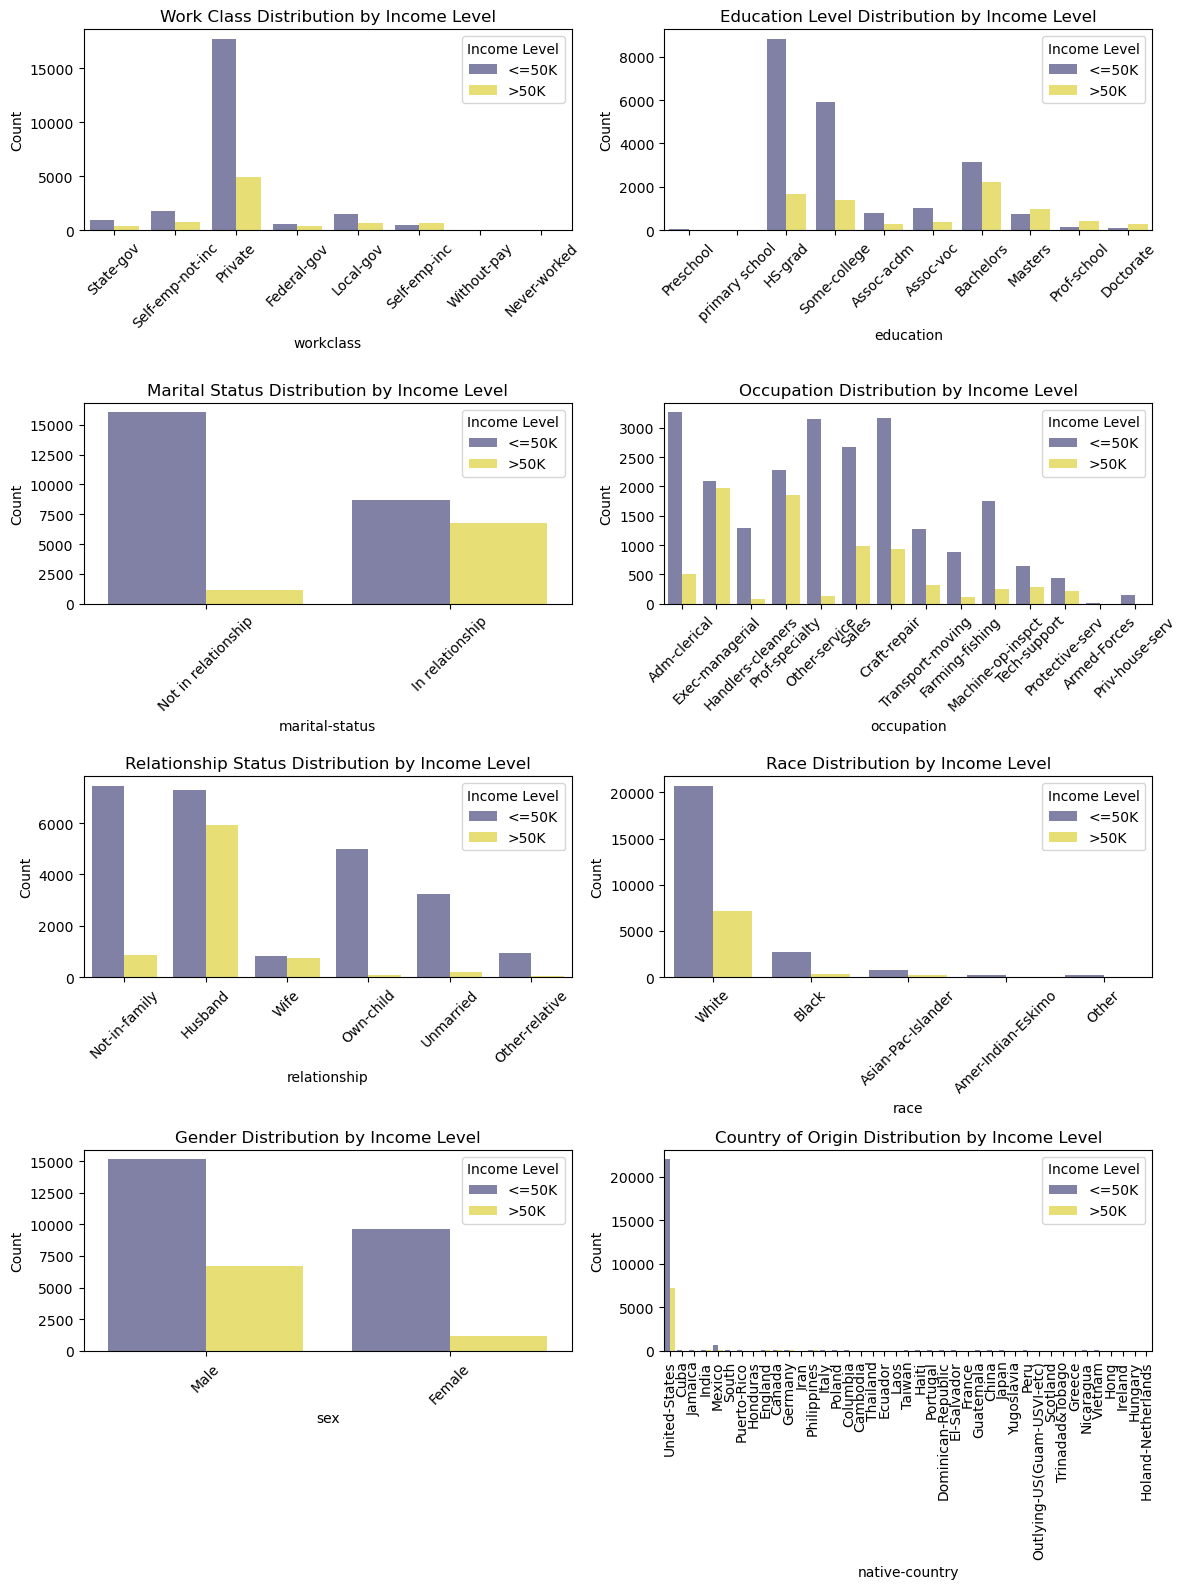

In [26]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# Loop through the categorical features and plot
for i, feature in enumerate(categorical_features):
    
    # Select color map
    cmap = plt.get_cmap("viridis")

    # Set custom order for education feature
    if feature == 'education':
        order = education_order
    elif feature == 'age':
        order == age_group_order
    else:
        order = None  # No custom order for other features

    # Create the countplot for each categorical feature
    sns.countplot(
        x=feature, 
        hue=adult_df["income"].map({0: "<=50K", 1: ">50K"}),
        data=adult_df, 
        palette=[cmap(0.2), cmap(0.99)], 
        ax=axes[i],
        order=order,
        alpha=0.7
    )
    
    # Set plot titles and labels
    axes[i].set_title(custom_titles[feature])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title="Income Level")

    # Set rotation for x-axis labels
    if feature == 'native-country':
        axes[i].tick_params(axis='x', rotation=90)
    else:
        axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Data preprocessing

Handling missing data with KNN imputation

In [27]:
# Before
adult_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
age_groups           0
dtype: int64

In [28]:
# Before
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  int64 
 15  age_groups      32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [29]:
# Columns to encode
columns_to_encode = ["workclass", "education", "marital-status", "occupation",
                     "relationship", "race", "sex", "native-country", "age_groups"]


# Replace NaN with "missing" only in the specified columns
adult_df[columns_to_encode] = adult_df[columns_to_encode].fillna('missing')

# Check
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
age_groups        0
dtype: int64

In [30]:
# Encode categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    # Add 'missing' explicitly to the column's values before fitting
    unique_values = list(adult_df[col].unique()) + ['missing']
    le.fit(unique_values)
    adult_df[col] = le.transform(adult_df[col])
    label_encoders[col] = le


# Identify and replace the "missing" values with NaN
missing_values = {}
for col, le in label_encoders.items():
    missing_label = le.transform(['missing'])[0]
    missing_values[col] = missing_label
    adult_df[col] = adult_df[col].replace(missing_label, np.nan)

# Check
adult_df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
age_groups           0
dtype: int64

In [31]:
# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
adult_df = pd.DataFrame(imputer.fit_transform(adult_df), columns=adult_df.columns)

In [32]:
# Check 
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
age_groups        0
dtype: int64

In [33]:
# Check
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  float64
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  float64
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  float64
 6   occupation      32561 non-null  float64
 7   relationship    32561 non-null  float64
 8   race            32561 non-null  float64
 9   sex             32561 non-null  float64
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  float64
 14  income          32561 non-null  float64
 15  age_groups      32561 non-null  float64
dtypes: float64(16)
memory usage: 4.0 MB


In [34]:
# Reverse label encoding (for now)

# Decode the categorical columns
for col in columns_to_encode:
    le = label_encoders[col]  # Get the LabelEncoder for the column
    adult_df[col] = adult_df[col].apply(lambda x: le.inverse_transform([int(x)])[0])

# Check the reversed DataFrame
print(adult_df.head(50))

     age         workclass    fnlwgt     education  education-num  \
0   39.0         State-gov   77516.0     Bachelors           13.0   
1   50.0  Self-emp-not-inc   83311.0     Bachelors           13.0   
2   38.0           Private  215646.0       HS-grad            9.0   
3   53.0           Private  234721.0     preschool            7.0   
4   28.0           Private  338409.0     Bachelors           13.0   
5   37.0           Private  284582.0       Masters           14.0   
6   49.0           Private  160187.0     preschool            5.0   
7   52.0  Self-emp-not-inc  209642.0       HS-grad            9.0   
8   31.0           Private   45781.0       Masters           14.0   
9   42.0           Private  159449.0     Bachelors           13.0   
10  37.0           Private  280464.0  Some-college           10.0   
11  30.0         State-gov  141297.0     Bachelors           13.0   
12  23.0           Private  122272.0     Bachelors           13.0   
13  32.0           Private  205019

In [35]:
# Check
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  float64
 15  age_groups      32561 non-null  object 
dtypes: float64(7), object(9)
memory usage: 4.0+ MB


Encoding categorical features using LabelEncoder and preparing the unsupervised learning part

In [36]:
#Make a new dataframe to work with during the unsupervised part

#income dropped as unsupervised learning does not rely on labels
adult_income_pca = adult_df.drop(["income", "education-num", "age_groups"], axis=1)

In [37]:
#Figuring out which columns to convert
categorical_columns = adult_income_pca.select_dtypes(include="object")

categorical_columns.nunique()

#As we can see sex and marital status only has two unique values
#In order to prevent too many columns we will use label encoder
#for low cardinality columns here defined as having less than 8 unique values

workclass          8
education         10
marital-status     2
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

In [38]:
#We will label encode the categorical columns with fewer than 7 values
encoder = LabelEncoder()

columnsToEncode = ["marital-status","race","sex"]

for column in adult_income_pca.columns:
    if column in columnsToEncode:
        adult_income_pca[column] = encoder.fit_transform(adult_income_pca[column])

In [39]:

oneHot_encoder = OneHotEncoder(sparse_output=False)

categorical_columns = adult_income_pca.select_dtypes(include="object").columns

oneHot_encoded_array = oneHot_encoder.fit_transform(adult_income_pca[categorical_columns])

encoded_columns = oneHot_encoder.get_feature_names_out(categorical_columns)

encoded_df = pd.DataFrame(oneHot_encoded_array, columns=encoded_columns, index=adult_income_pca.index)

adult_income_pca = adult_income_pca.drop(columns=categorical_columns).join(encoded_df)

adult_income_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 87 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        32561 non-null  float64
 1   fnlwgt                                     32561 non-null  float64
 2   marital-status                             32561 non-null  int64  
 3   race                                       32561 non-null  int64  
 4   sex                                        32561 non-null  int64  
 5   capital-gain                               32561 non-null  float64
 6   capital-loss                               32561 non-null  float64
 7   hours-per-week                             32561 non-null  float64
 8   workclass_Federal-gov                      32561 non-null  float64
 9   workclass_Local-gov                        32561 non-null  float64
 10  workclass_Never-worked

In [40]:
# Using LabelEncoder to change categorical valuees into numerical ones
label_encoder = LabelEncoder()

columns_to_encode = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "age_groups"]

for column in columns_to_encode:
    adult_df[column] = label_encoder.fit_transform(adult_df[column])

In [41]:
# Checking if it worked
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int64  
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  int64  
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  int64  
 6   occupation      32561 non-null  int64  
 7   relationship    32561 non-null  int64  
 8   race            32561 non-null  int64  
 9   sex             32561 non-null  int64  
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  int64  
 14  income          32561 non-null  float64
 15  age_groups      32561 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 4.0 MB


Unsupervised learning

In [42]:

#We start by scaling all the numerical columns and not the one-hot encoded ones
scaler = StandardScaler()

#We use the fact that the one-hot encoded clumns have a format with "_" in them
continous_columns = [col for col in adult_income_pca.columns if '_' not in col]

#Scale
scaler = StandardScaler()
adult_income_pca[continous_columns] = scaler.fit_transform(adult_income_pca[continous_columns])


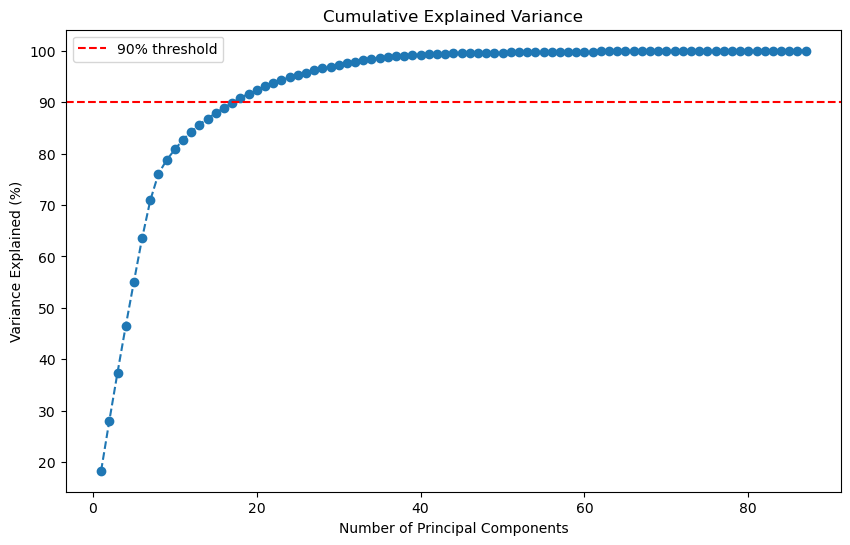

In [43]:
#Model over the the principal components and how much of the variance they explain
#90% threshold is put into the graph
pca_model = PCA(adult_income_pca.shape[1])

pca_model.fit(adult_income_pca)

n_components_to_plot = min(100, len(pca_model.explained_variance_ratio_))

explained_variance = np.cumsum(pca_model.explained_variance_ratio_[:n_components_to_plot]) * 100


plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components_to_plot + 1), explained_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained (%)")
plt.axhline(y=90, color='r', linestyle='--', label="90% threshold") 
plt.legend()
plt.show()

#We can see that we need between 15-20 PCs to represent 90% of the data
#Lets just calculate that precisely below

In [44]:
#The exact value that reaches just above 90%

explained_variance_cumulated = np.cumsum(pca_model.explained_variance_ratio_)

component90 = np.argmax(explained_variance_cumulated >= 0.9) + 1

print(component90)

#Value 18 is where we reach have reached 90%


18


In [45]:
#Analysis of the principal components using the 18 components calculated above
pca_model = PCA(n_components=component90)

pca_model.fit(adult_income_pca)

pca_data = pca_model.transform(adult_income_pca)

loadings = pca_model.components_

#lets have a look at the top 10 pc´s explaining about 80% of the data
for i, component in enumerate(loadings):
    #Make sure to only get the first 10
    if i >= 10:
        break
    #+1 since PCs start in 0
    print(f"Principal Component {i + 1}")
    #We use absolute values as we also want to capture the importance of negative values in the vectors
    print(sorted(zip(adult_income_pca.columns, np.abs(component)), key=lambda x: -x[1]))

#Below are shown the PCs 

Principal Component 1
[('marital-status', 0.5896899731558923), ('sex', 0.4840194124638662), ('age', 0.34619783439957946), ('hours-per-week', 0.3341103942328594), ('relationship_Husband', 0.2970067487907559), ('capital-gain', 0.14099553307475304), ('race', 0.1350709685284802), ('capital-loss', 0.12030462547590949), ('relationship_Own-child', 0.1098202886631551), ('relationship_Not-in-family', 0.10787271509487746), ('relationship_Unmarried', 0.06134424081530417), ('workclass_Private', 0.05764296904116341), ('occupation_Other-service', 0.05070389015117371), ('occupation_Adm-clerical', 0.05047797371305654), ('fnlwgt', 0.04414519759686719), ('occupation_Craft-repair', 0.04049531639422655), ('education_Some-college', 0.037619114290332434), ('workclass_Self-emp-not-inc', 0.03477462862288262), ('occupation_Exec-managerial', 0.034439467038390036), ('workclass_Self-emp-inc', 0.02147327485727366), ('education_Bachelors', 0.019818652586212446), ('occupation_Transport-moving', 0.016931429751052537)

In [46]:
#We now wish to know what the  best features that explain the variance of the dataset and their mean loading value

#We here use the fact that all one-hot encoded columns have a "_" after the feature name,
#this way we just split on "_" and map it to the original value
original_columns = adult_income_pca.columns.map(lambda col: col.split('_')[0])


column_contributions = {}

#Find the absolute value of each component in the loading and map it back to the original value in the adult_df
for component in loadings:
    for col, value in zip(adult_income_pca.columns, np.abs(component)):
        original_col = col.split('_')[0]
        column_contributions[original_col] = column_contributions.get(original_col, 0) + value

#Every value will be divided by component90 to get the mean
for col in column_contributions:
    column_contributions[col] = column_contributions[col]/component90

best_columns = sorted(column_contributions.items(), key=lambda x: -x[1])[:13]

print("Columns Contributing to Variance in order:")
for original_col, total_contribution in best_columns:
    print(f"{original_col}: {total_contribution:.4f}")

Columns Contributing to Variance in order:
occupation: 0.7592
education: 0.5120
relationship: 0.4714
workclass: 0.2961
age: 0.1703
hours-per-week: 0.1469
sex: 0.1429
capital-loss: 0.1288
capital-gain: 0.1274
marital-status: 0.1262
fnlwgt: 0.1212
race: 0.1166
native-country: 0.1010


KMeans clustering and T-Sne for visualization

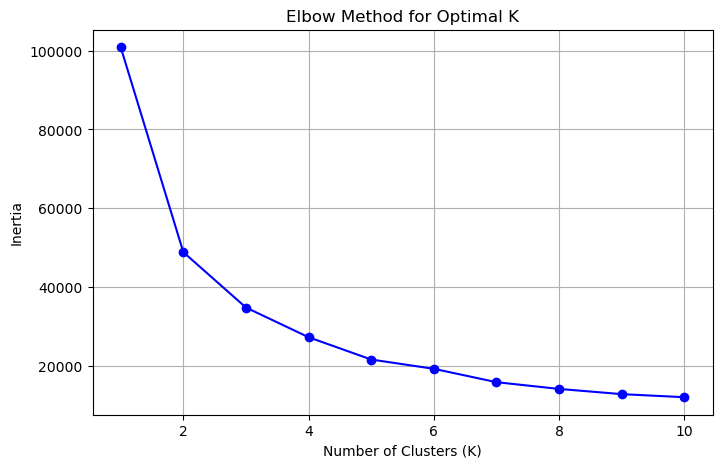

In [47]:
#This plot is for showing how the elbow principle works

#Find elbow
inertia = []
#We use the range 1-11
K = range(1, 11) 
#Using first and second PC
pca_pc1_pc2 = pca_data[:, :2]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=99)
    kmeans.fit(pca_pc1_pc2)
    inertia.append(kmeans.inertia_)
#Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [48]:
# Use the KneeLocator from the kneed library to find the elbow point.

kl = KneeLocator(K, inertia, curve="convex", direction="decreasing")
elbow_point = kl.elbow
print(f"The optimal number of clusters is: {elbow_point}.")
# Apply the k-means algorithm.
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
kmeans.fit(pca_pc1_pc2) 

The optimal number of clusters is: 3.


KMeans(n_clusters=3, random_state=42)

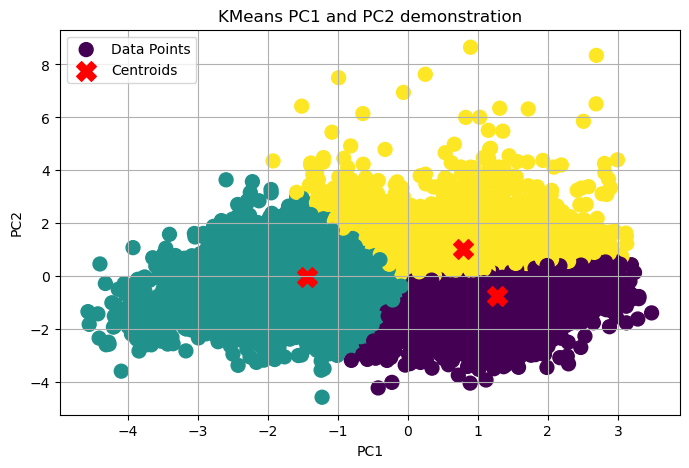

In [49]:
#This is to show how to plot the first kmeans analysis

#Plot figure
plt.figure(figsize=(8, 5))
#plot pc1 and pc2
plt.scatter(pca_pc1_pc2[:, 0], pca_pc1_pc2[:, 1], c=kmeans.labels_ , cmap='viridis', s=100, label='Data Points')

# Plot centroids
plt.scatter(kmeans.cluster_centers_ [:, 0], kmeans.cluster_centers_ [:, 1], c='red', s=200, marker='X', label='Centroids')


plt.title('KMeans PC1 and PC2 demonstration')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

#This shows how we want to make the clusters for the first and second pc´s 

In [50]:
#Calculating the s_score for pc1 and pc2
s_score = silhouette_score(pca_pc1_pc2, kmeans.labels_)

print(s_score)

0.42793798057249466


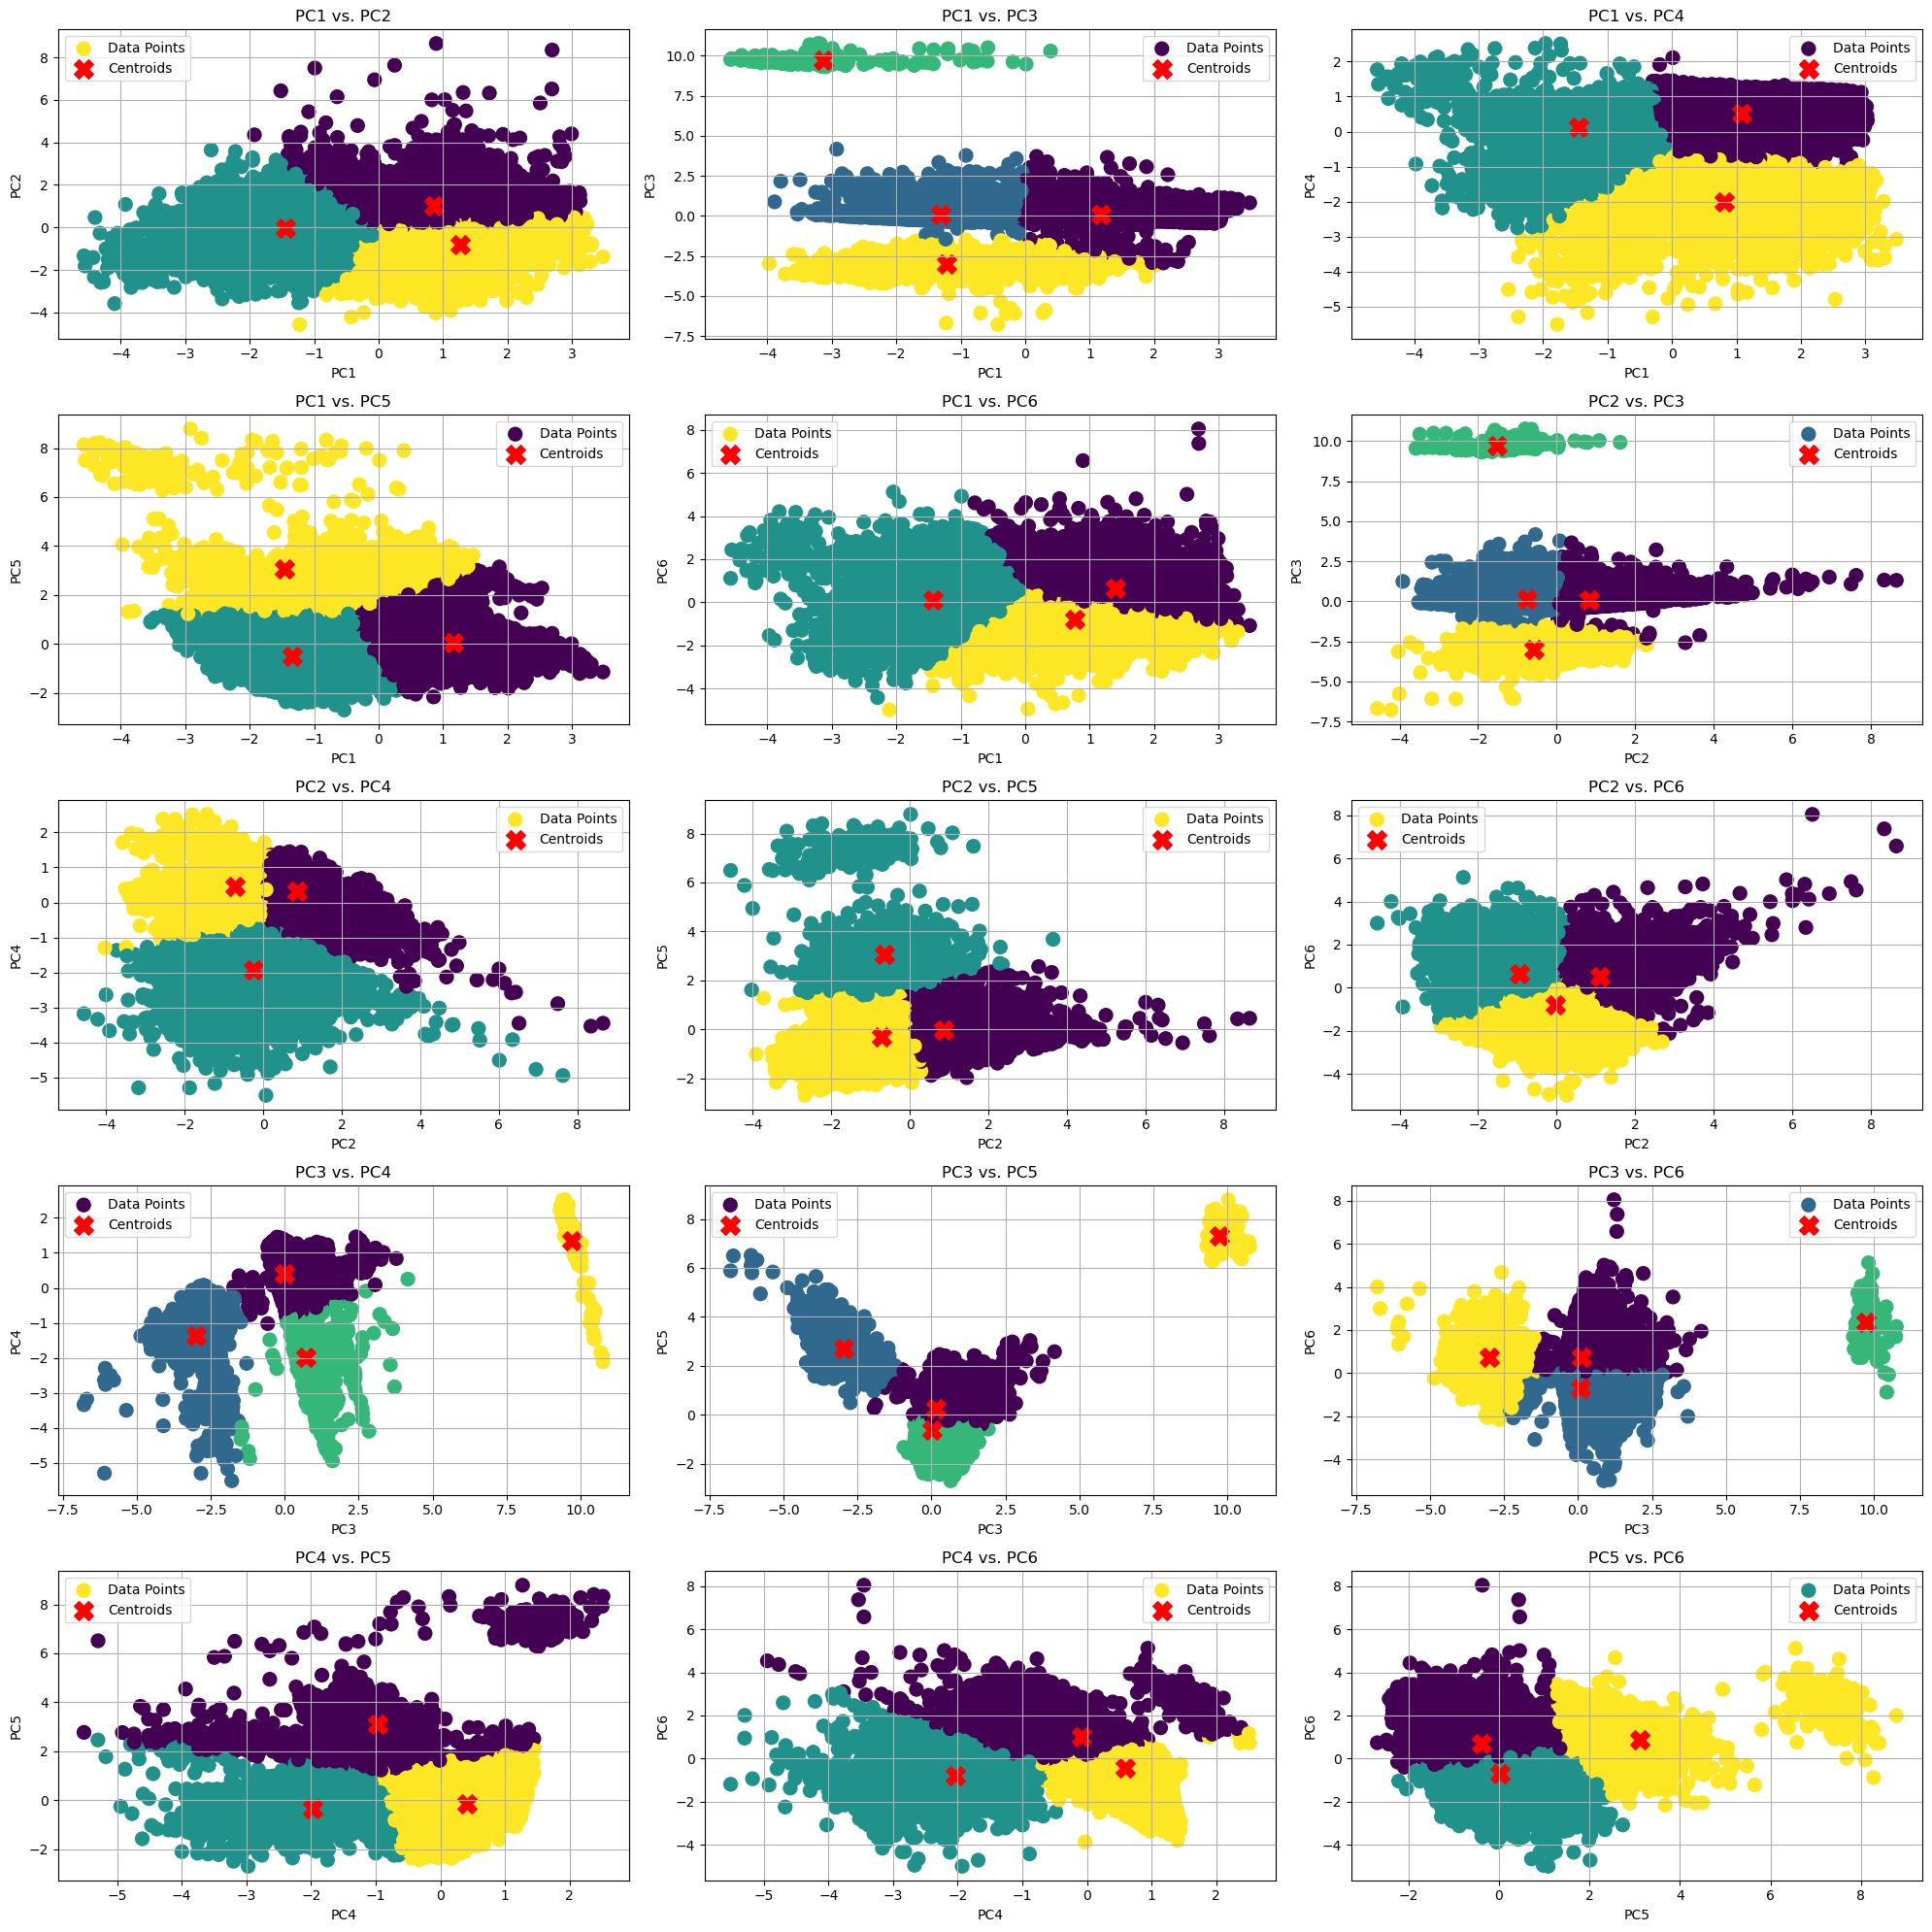

In [51]:
pc_range = range(1, 7)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

plot_idx = 0


#A nested for loop going Through 6 pairs and making a kmeans cluster analysis on these using the elbow principle
for i in pc_range:
    
    for k in range(i+1, 7):
        pc_values = pca_data[:, [i-1, k-1]]
        
        inertia = []
        K = range(1, 10)
        
        for n_clusters in K:
            kmeans = KMeans(n_clusters=n_clusters, random_state=99)
            kmeans.fit(pc_values)
            inertia.append(kmeans.inertia_)
        
        # Find the elbow point using KneeLocator
        kl = KneeLocator(K, inertia, curve="convex", direction="decreasing")
        elbow_point = kl.elbow
        
        
        # Fit model
        kmeans = KMeans(n_clusters=elbow_point, random_state=99)
        kmeans.fit(pc_values)
        #Find the labels from the kmeans analysis
        labels = kmeans.labels_  
        #Find centroids
        centroids = kmeans.cluster_centers_ 

        # Plot the clustering results
        ax = axes[plot_idx]
        ax.scatter(pc_values[:, 0], pc_values[:, 1], c=labels, cmap='viridis', s=100, label='Data Points')
        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
        ax.set_title(f'PC{i} vs. PC{k}')
        ax.set_xlabel(f'PC{i}')
        ax.set_ylabel(f'PC{k}')
        ax.grid(True)
        ax.legend()

        # Increment the plot index
        plot_idx += 1

plt.tight_layout()
plt.show()

In [52]:
#Reviewing these clusters give a clear indication that we are working with mostly 3
#We here wish to find the mean of number of clusters using elbow principle and 

#Range from 1 to component90
all_PCs = range(1,component90)
sumOfValues = 0
counter = 0

#Double nested for loop
for i in pc_range:
    
    for k in range(i+1, component90+1):
        pc_values = pca_data[:, [i-1, k-1]]
        
        inertia = []
        K = range(1, 10)
        
        for n_clusters in K:
            kmeans = KMeans(n_clusters=n_clusters, random_state=99)
            kmeans.fit(pc_values)
            inertia.append(kmeans.inertia_)
        
        # Find the elbow point using KneeLocator
        kl = KneeLocator(K, inertia, curve="convex", direction="decreasing")
        elbow_point = kl.elbow
        sumOfValues += elbow_point
        counter += 1
sumOfValues /= counter
print(sumOfValues)  

#Please note that this takes a bit of time, around  min on my computer
#We see that we have a mean of 2.9 clusters 

2.9195402298850577


Using T-SNE to reduce to two dimensions

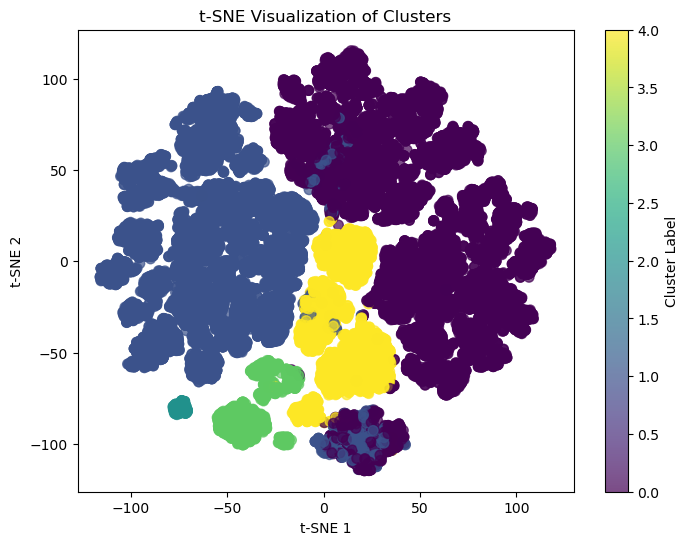

In [53]:
#Make PCA with components explaining 90% of the variance
pca_for_tsne = PCA(n_components=component90)

pca_result = pca_for_tsne.fit_transform(adult_income_pca)


#Find elbow before clustering
inertia = []
K = range(1, 10)
        
for n_clusters in K:
    kmeans = KMeans(n_clusters=n_clusters, random_state=99)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Find the elbow point using KneeLocator
kl = KneeLocator(K, inertia, curve="convex", direction="decreasing")
elbow_point = kl.elbow

# Fit model
kmeans = KMeans(n_clusters=elbow_point, random_state=99)
kmeans.fit(pca_result)

#Init tsne model and fit the pca data 
tsne_model = TSNE(n_components=2, random_state=42)
tsne_data = tsne_model.fit_transform(pca_result)

#Get labels
labels = kmeans.labels_  

plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

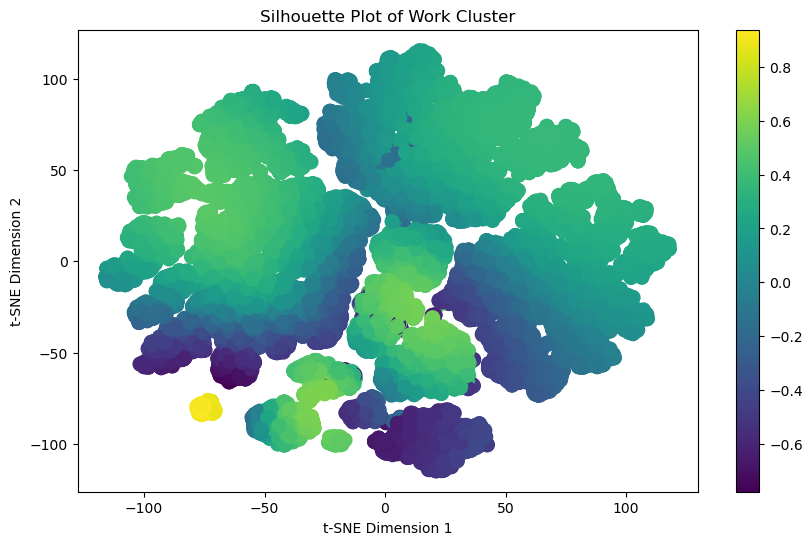

In [54]:
#Analyzing the plot using silhouette coefficient

sample_silhouette_values = silhouette_samples(tsne_data, labels)

#Plot
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=sample_silhouette_values, cmap='viridis', s=100)
ax.set_title('Silhouette Plot of Work Cluster')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
plt.colorbar(sc)
plt.show()


In [55]:
#Based on the 3 clusters above we wish to find the top 5 most defining features in the clusters

#Add the labels of the cluster to the work_columns

adult_income_pca['Cluster'] = labels

#Group by clusters

clusters = adult_income_pca.groupby('Cluster').mean()

for cluster in clusters.index:
    data = clusters.loc[cluster]
    #Take both positive and negative values
    absolute_values = data.abs()
    sort = absolute_values.sort_values(ascending=False)
    print(f"Cluster {cluster} variables:")
    print(sort.head(5))

Cluster 0 variables:
native-country_United-States    0.924918
marital-status                  0.825248
workclass_Private               0.793267
relationship_Not-in-family      0.459270
sex                             0.447654
Name: 0, dtype: float64
Cluster 1 variables:
marital-status                  1.038086
relationship_Husband            0.925392
native-country_United-States    0.923817
workclass_Private               0.672470
sex                             0.608985
Name: 1, dtype: float64
Cluster 2 variables:
capital-gain                    13.394578
native-country_United-States     0.924528
relationship_Husband             0.761006
hours-per-week                   0.758168
marital-status                   0.727018
Name: 2, dtype: float64
Cluster 3 variables:
capital-loss                    4.508910
native-country_United-States    0.925575
workclass_Private               0.668471
relationship_Husband            0.577131
marital-status                  0.364784
Name: 3, dtype: flo

### Support Vector Classification

In [56]:
# Defining train and test set
X = adult_income_pca
y = adult_df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
# Defining Support Vector Classifier model
svc = SVC() 

# Different values for hyperparams to be tried by Gridsearch
param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 1], 
    'kernel': ['linear', 'rbf']
}

# Run Gridsearch with F1 as scorer
scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(svc, param_grid, cv=2, scoring=scorer, verbose=3)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Testing the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END .....C=1, gamma=0.1, kernel=linear;, score=0.650 total time=  10.0s
[CV 2/2] END .....C=1, gamma=0.1, kernel=linear;, score=0.653 total time=   9.4s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.650 total time=  13.0s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.667 total time=  10.6s
[CV 1/2] END .......C=1, gamma=1, kernel=linear;, score=0.650 total time=   9.1s
[CV 2/2] END .......C=1, gamma=1, kernel=linear;, score=0.653 total time=   9.1s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.461 total time=  31.1s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.440 total time=  35.3s
[CV 1/2] END ....C=10, gamma=0.1, kernel=linear;, score=0.648 total time=  19.9s
[CV 2/2] END ....C=10, gamma=0.1, kernel=linear;, score=0.653 total time=  19.5s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.649 total time=  12.0s
[CV 2/2] END .......C=10, gamma=0.1, kernel=rbf;,

In [58]:
# Testing with SMOTE balancing of dataset
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, f1_score

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [59]:
# Gridsearch was also run with SMOTE, returning very similar values.
# SMOTE is used here on the model found on unbalanced dataset to 
# demonstrate how it affects precision and recall on class 1. 
svc = SVC(C=10, kernel="linear")
svc.fit(X_resampled, y_resampled)
y_pred = svc.predict(X_test)

print('SVC accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

SVC accuracy: 0.7994
              precision    recall  f1-score   support

         0.0       0.94      0.78      0.86      6214
         1.0       0.55      0.85      0.67      1927

    accuracy                           0.80      8141
   macro avg       0.75      0.82      0.76      8141
weighted avg       0.85      0.80      0.81      8141



### Logistic Regression

In [60]:
# Check the distribution of unique combinations of "age" and "income"
print(adult_df[['age', 'income']].value_counts(sort=False).to_string())

age   income
17.0  0.0       395
18.0  0.0       550
19.0  0.0       710
      1.0         2
20.0  0.0       753
21.0  0.0       717
      1.0         3
22.0  0.0       752
      1.0        13
23.0  0.0       865
      1.0        12
24.0  0.0       767
      1.0        31
25.0  0.0       788
      1.0        53
26.0  0.0       722
      1.0        63
27.0  0.0       754
      1.0        81
28.0  0.0       748
      1.0       119
29.0  0.0       679
      1.0       134
30.0  0.0       690
      1.0       171
31.0  0.0       705
      1.0       183
32.0  0.0       639
      1.0       189
33.0  0.0       684
      1.0       191
34.0  0.0       643
      1.0       243
35.0  0.0       659
      1.0       217
36.0  0.0       635
      1.0       263
37.0  0.0       566
      1.0       292
38.0  0.0       545
      1.0       282
39.0  0.0       538
      1.0       278
40.0  0.0       526
      1.0       268
41.0  0.0       529
      1.0       279
42.0  0.0       510
      1.0       270
43.0  0

In [61]:
# Check the distribution of unique combinations of "education-num" and "income"
print(adult_df[['education-num', 'income']].value_counts(sort=False))

education-num  income
1.0            0.0         51
2.0            0.0        162
               1.0          6
3.0            0.0        317
               1.0         16
4.0            0.0        606
               1.0         40
5.0            0.0        487
               1.0         27
6.0            0.0        871
               1.0         62
7.0            0.0       1115
               1.0         60
8.0            0.0        400
               1.0         33
9.0            0.0       8826
               1.0       1675
10.0           0.0       5904
               1.0       1387
11.0           0.0       1021
               1.0        361
12.0           0.0        802
               1.0        265
13.0           0.0       3134
               1.0       2221
14.0           0.0        764
               1.0        959
15.0           0.0        153
               1.0        423
16.0           0.0        107
               1.0        306
Name: count, dtype: int64


In [62]:
# Check the distribution of unique combinations of "hours-per-week" and "income"
print(adult_df[['hours-per-week', 'income']].value_counts(sort=False).to_string())

hours-per-week  income
1.0             0.0          18
                1.0           2
2.0             0.0          24
                1.0           8
3.0             0.0          38
                1.0           1
4.0             0.0          51
                1.0           3
5.0             0.0          53
                1.0           7
6.0             0.0          56
                1.0           8
7.0             0.0          22
                1.0           4
8.0             0.0         134
                1.0          11
9.0             0.0          17
                1.0           1
10.0            0.0         258
                1.0          20
11.0            0.0          11
12.0            0.0         161
                1.0          12
13.0            0.0          21
                1.0           2
14.0            0.0          32
                1.0           2
15.0            0.0         389
                1.0          15
16.0            0.0         192
                1

In [63]:
# Check the distribution of unique combinations of "education" and "education-num"
print(adult_df[['education', 'education-num']].value_counts(sort=False))

education  education-num
0          12.0              1067
1          11.0              1382
2          13.0              5355
3          16.0               413
4          9.0              10501
5          14.0              1723
6          1.0                 51
7          15.0               576
8          10.0              7291
9          2.0                168
           3.0                333
           4.0                646
           5.0                514
           6.0                933
           7.0               1175
           8.0                433
Name: count, dtype: int64


In [64]:
# Check the distribution of unique combinations of "marital-status" and "income"
print(adult_df[['marital-status', 'income']].value_counts(sort=False))

# Create a new column "marital-status_int" based on the "marital-status" column
adult_df["marital-status_int"] = adult_df["marital-status"].apply(
    lambda x: 0 if x == "Never-married"
    else 1 if x == "Married-civ-spouse"
    else 0
)

marital-status  income
0               0.0        8681
                1.0        6736
1               0.0       16039
                1.0        1105
Name: count, dtype: int64


In [65]:
# Check the distribution of unique combinations of "occupation" and "income" in the dataset
print(adult_df[['occupation', 'income']].value_counts(sort=False))

# Create a new column "occupation_int" based on the "occupation" column
adult_df["occupation_int"] = adult_df["occupation"].apply(
    lambda x: 0 if x == "Handlers-cleaners"
    else 0 if x == "Other-service"
    else 0 if x == "Priv-house-serv"
    else 3 if x == "Exec-managerial"
    else 3 if x == "Prof-specialty"
    else 2 if x == "Protective-serv"
    else 2 if x == "Craft-repair"
    else 2 if x == "Protective-serv"
    else 2 if x == "Sales"
    else 2 if x == "Tech-support"
    else 1
)

# Check the distribution of "occupation_int" and "income"
print(adult_df[['occupation_int', 'income']].value_counts(sort=False))

occupation  income
0           0.0       3265
            1.0        507
1           0.0         27
            1.0          2
2           0.0       3236
            1.0        938
3           0.0       2245
            1.0       1985
4           0.0       1122
            1.0        145
5           0.0       1608
            1.0        128
6           0.0       2085
            1.0        285
7           0.0       3423
            1.0        168
8           0.0        305
            1.0         16
9           0.0       2342
            1.0       1866
10          0.0        470
            1.0        215
11          0.0       2669
            1.0        983
12          0.0        646
            1.0        283
13          0.0       1277
            1.0        320
Name: count, dtype: int64
occupation_int  income
1               0.0       24720
                1.0        7841
Name: count, dtype: int64


In [66]:
# Create a new column "race_int" based on the "race" column
adult_df["race_int"] = adult_df["race"].apply(
    lambda x: 0 if x == "Other"
    else 0 if x == "Amer-Indian-Eskimo"
    else 0 if x == "Black"
    else 1 if x == "Asian-Pac-Islander"
    else 1 if x == "White"
    else 2
)

# Displays the count of each unique combination of 'race_int' and 'income' in the DataFrame.
print(adult_df[['race_int', 'income']].value_counts(sort=False))

race_int  income
2         0.0       24720
          1.0        7841
Name: count, dtype: int64


In [67]:
# Displays the counts of unique combinations of values in the 'sex' and 'income' 
#columns from the adult_df DataFrame, without sorting the output.
print(adult_df[['sex', 'income']].value_counts(sort=False))

# Create a new column "sex_int" based on the "sex" column
adult_df["sex_int"] = adult_df["sex"].apply(
    lambda x: 0 if x == "Female"
    else 1 if x == "Male"
    else 2
)

sex  income
0    0.0        9592
     1.0        1179
1    0.0       15128
     1.0        6662
Name: count, dtype: int64


In [68]:
# Create a new column "workclass_int" based on the "workclass" column
adult_df["workclass_int"] = adult_df["workclass"].apply(
    lambda x: 0 if x == "Never-worked"
    else 0 if x == "Without-pay"
    else 0 if x == "?"
    else 1 if x == "State-gov"
    else 1 if x == "Local-gov"
    else 1 if x == "Federal-gov"
    else 2 if x == "Private"
    else 2 if x == "Self-emp-not-inc"
    else 2 if x == "Self-emp-inc"
    else 1
)

# Check the distribution of unique combinations of "workclass" and "income"
adult_df[['workclass', 'income']].value_counts(sort=False)

workclass  income
0          0.0         589
           1.0         372
1          0.0        1505
           1.0         619
2          0.0         447
           1.0          53
3          0.0       18830
           1.0        5084
4          0.0         571
           1.0         636
5          0.0        1819
           1.0         724
6          0.0         945
           1.0         353
7          0.0          14
Name: count, dtype: int64

Coefficients for the full set
             features                  coef
0                 age  [0.5867869234026433]
1       education-num  [0.8303846639126443]
2        capital-gain  [2.3453568098431785]
3        capital-loss  [0.2812190838894898]
4      hours-per-week  [0.5029678047877625]
5       workclass_int                 [0.0]
6  marital-status_int                 [0.0]
7      occupation_int                 [0.0]

Coefficients for the training set
             features                  coef
0                 age  [0.5910234718501147]
1       education-num  [0.8230638457535528]
2        capital-gain   [2.339462284470965]
3        capital-loss  [0.2719176797130735]
4      hours-per-week  [0.5116375316650857]
5       workclass_int                 [0.0]
6  marital-status_int                 [0.0]
7      occupation_int                 [0.0]
[-1.34112323]

Test set score: 0.818

F1-score
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.

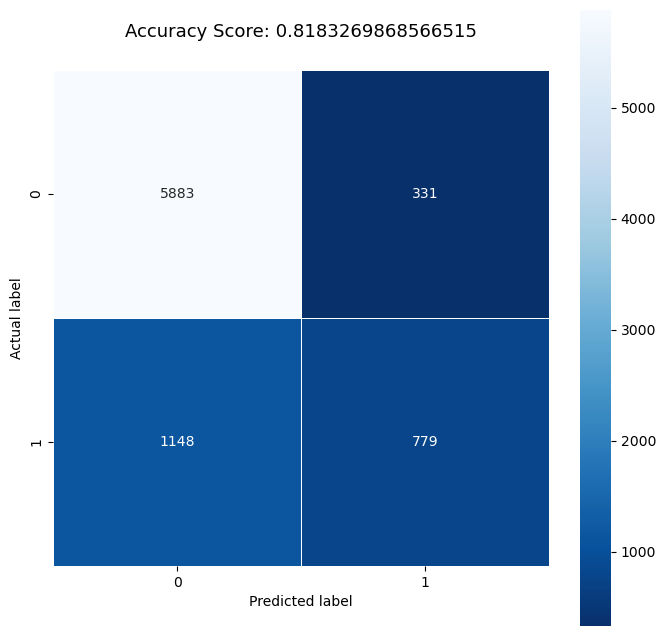

In [69]:
# Choose the columns to be used for the regression test and set the dependent and independent variables
# columns = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week", "workclass_int"]
# columns = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week", 
#            "workclass_int", "marital-status_int", "occupation_int", "sex_int", "race_int" ]
columns = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week", "workclass_int", "marital-status_int", "occupation_int"]

# Define independent variables (X) and dependent variable (y)
X = pd.DataFrame(adult_df, columns=columns) 
y = adult_df["income"]

# Normalizing the independent variables to be able to compare their coefficients
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Splitting the dataset in training data and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Initialize and fit a Logistic Regression model to the full dataset.
logisticRegr = LogisticRegression(max_iter=10000, solver='lbfgs', verbose=0)
logisticRegr.fit(X_scaled, y)

# Display coefficients for the full dataset
print('Coefficients for the full set')
print(pd.DataFrame(zip(X.columns, np.transpose(logisticRegr.coef_)), columns=['features', 'coef']))

# Fit the Logistic Regression model to the training dataset
logisticRegr.fit(X_train, y_train)

# Display coefficients for the training dataset
print('\nCoefficients for the training set')
print(pd.DataFrame(zip(X.columns, np.transpose(logisticRegr.coef_)), columns=['features', 'coef']))
print(logisticRegr.intercept_)

# Calculating predictions for the test data and evaluating the score
y_test_pred = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_test_pred)

# Drawing a plot with the result
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {score}', size = 13, y=1.05)

# Print the model evaluation metrics.
print("\nTest set score: {:.3f}".format(logisticRegr.score(X_test,y_test)))

print('\nF1-score')
print(metrics.classification_report(y_test, y_test_pred))
